<div style="width: 90%; height: 100px; background-color: #ffffff; border: 3px solid #d62d20; text-align: center; line-height: 100px; color: #0057e7; font-size: 24px; font-weight: bold; border-radius:6px;">
    📉 Merge, Join, Concatenate and Compare 📈
</div>

<div style="text-align:center; border: 1px solid black; padding: 10px;">
    <img src="https://devskrol.com/wp-content/uploads/2020/10/mERGE.png" alt="Descripción de la imagen" style="width: 50%; height: auto;">
</div>

https://pandas.pydata.org/docs/user_guide/merging.html

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# **1.- CONCAT()**

El método **concat()** de Pandas, es un método que nos permite concatenar objetos de Pandas (Series o DataFrames) a lo largo de un eje en particular.

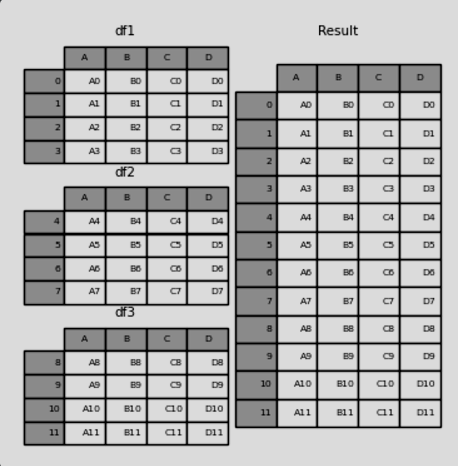

In [ ]:
# Cargar el dataset sobre las propinas en un restaurante
df = sns.load_dataset('tips')

# Mostrar el DataFrame
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [68]:
df1 = df.loc[np.arange(5),['total_bill','tip','sex']]
df1

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


In [69]:
df2 = df.loc[np.arange(5,11,1),['total_bill','tip','sex','smoker']]
df2

,total_bill,tip,sex,smoker
5,25.29,4.71,Male,No
6,8.77,2.00,Male,No
7,26.88,3.12,Male,No
8,15.04,1.96,Male,No
9,14.78,3.23,Male,No
10,10.27,1.71,Male,No


In [70]:
df3 = df.loc[np.arange(10,17),['total_bill','tip','sex']]
df3

,total_bill,tip,sex
10,10.27,1.71,Male
11,35.26,5.00,Female
12,15.42,1.57,Male
13,18.43,3.00,Male
14,14.83,3.02,Female
15,21.58,3.92,Male
16,10.33,1.67,Female


In [51]:
frames = [df1,df2,df3]

In [53]:
result = pd.concat(frames)
result

,total_bill,tip,sex,smoker
0,16.99,1.01,Female,NaN
1,10.34,1.66,Male,NaN
2,21.01,3.50,Male,NaN
3,23.68,3.31,Male,NaN
4,24.59,3.61,Female,NaN
5,25.29,4.71,Male,No
6,8.77,2.00,Male,No
7,26.88,3.12,Male,No
8,15.04,1.96,Male,No
9,14.78,3.23,Male,No


Vemos cómo, por defecto, la concatenación se ha realizado a lo largo del eje 0(eje vertical), uniendo los índices de fila de ambos dataframes, y alineando las columnas por su etiqueta. Los valores para los que no hay datos se han rellenado `NaN` (opción correspondiente ala rgumento por defecto *join: outer*)

Si especificamos que la concatenación se realice a lo largo del eje 1 (eje horizontal), el resultado es el siguiente:

* Indice no Iguales

In [71]:
df_concat_diferent = pd.concat([df1,df2,df3],axis = 1)
df_concat_diferent

,total_bill,tip,sex,total_bill,tip,sex,smoker,total_bill,tip,sex
0,16.99,1.01,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.34,1.66,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.01,3.50,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.68,3.31,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.59,3.61,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,25.29,4.71,Male,No,NaN,NaN,NaN
6,NaN,NaN,NaN,8.77,2.00,Male,No,NaN,NaN,NaN
7,NaN,NaN,NaN,26.88,3.12,Male,No,NaN,NaN,NaN
8,NaN,NaN,NaN,15.04,1.96,Male,No,NaN,NaN,NaN
9,NaN,NaN,NaN,14.78,3.23,Male,No,NaN,NaN,NaN


* Indice iguales en los DataFrame

In [72]:
df1 = df.loc[np.arange(5),['total_bill','tip','sex']]
df2 = df.loc[np.arange(5),['sex', 'smoker', 'day']]
df3 = df.loc[np.arange(5),['time', 'size']]

In [73]:
df_eje1 = pd.concat([df1,df2,df3],axis =1)
df_eje1

,total_bill,tip,sex,sex,smoker,day,time,size
0,16.99,1.01,Female,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,Female,No,Sun,Dinner,4


## Lógica de unión del eje resultante

La `join` palabra clave especifica cómo manejar los valores del eje que no existen en el primer DataFrame

`Join:'outer` (opción por defecto), considerando todas las etiquetas de los dos dataframes aun cuando no sean comunes a ambos.

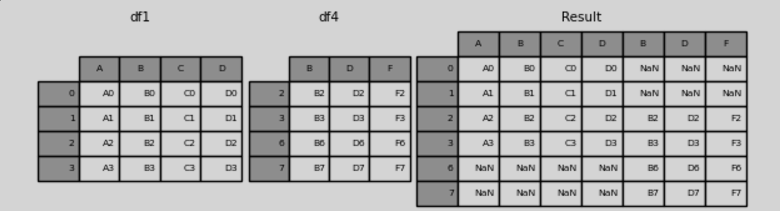

In [93]:
df1 = df.loc[[0,1,2,3,4],['total_bill','tip','sex']]
df1

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


In [94]:
df2 = df.loc[[2,3,4,5,6,7],['total_bill','tip','time','size']]
df2

,total_bill,tip,time,size
2,21.01,3.50,Dinner,3
3,23.68,3.31,Dinner,2
4,24.59,3.61,Dinner,4
5,25.29,4.71,Dinner,4
6,8.77,2.00,Dinner,2
7,26.88,3.12,Dinner,4


In [95]:
df_concat = pd.concat([df1,df2],join = 'outer',axis = 0)
df_concat

,total_bill,tip,sex,time,size
0,16.99,1.01,Female,NaN,NaN
1,10.34,1.66,Male,NaN,NaN
2,21.01,3.50,Male,NaN,NaN
3,23.68,3.31,Male,NaN,NaN
4,24.59,3.61,Female,NaN,NaN
2,21.01,3.50,NaN,Dinner,3.0
3,23.68,3.31,NaN,Dinner,2.0
4,24.59,3.61,NaN,Dinner,4.0
5,25.29,4.71,NaN,Dinner,4.0
6,8.77,2.00,NaN,Dinner,2.0


In [96]:
df_concat = pd.concat([df1,df2],join='outer',axis=1)
df_concat

,total_bill,tip,sex,total_bill,tip,time,size
0,16.99,1.01,Female,NaN,NaN,NaN,NaN
1,10.34,1.66,Male,NaN,NaN,NaN,NaN
2,21.01,3.50,Male,21.01,3.50,Dinner,3.0
3,23.68,3.31,Male,23.68,3.31,Dinner,2.0
4,24.59,3.61,Female,24.59,3.61,Dinner,4.0
5,NaN,NaN,NaN,25.29,4.71,Dinner,4.0
6,NaN,NaN,NaN,8.77,2.00,Dinner,2.0
7,NaN,NaN,NaN,26.88,3.12,Dinner,4.0


`Join:'inner'` solo toman a considerar solo las etiquetas comunes

In [97]:
df_concat = pd.concat([df1,df2],join = 'inner',axis = 0)
df_concat

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
5,25.29,4.71
6,8.77,2.00


In [98]:
df_concat = pd.concat([df1,df2],join = 'inner',axis = 1)
df_concat

,total_bill,tip,sex,total_bill,tip,time,size
2,21.01,3.50,Male,21.01,3.50,Dinner,3
3,23.68,3.31,Male,23.68,3.31,Dinner,2
4,24.59,3.61,Female,24.59,3.61,Dinner,4


## Ignorando índice en el eje de concatenación

Para **DataFrame** los objetos que no tienen un índice significativo, `ignore_index`se ignoran los índices superpuestos.

In [102]:
display(df1,df2)

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


,total_bill,tip,time,size
2,21.01,3.50,Dinner,3
3,23.68,3.31,Dinner,2
4,24.59,3.61,Dinner,4
5,25.29,4.71,Dinner,4
6,8.77,2.00,Dinner,2
7,26.88,3.12,Dinner,4


In [ ]:
pd.concat([df1,df2])

,total_bill,tip,sex,time,size
0,16.99,1.01,Female,NaN,NaN
1,10.34,1.66,Male,NaN,NaN
2,21.01,3.50,Male,NaN,NaN
3,23.68,3.31,Male,NaN,NaN
4,24.59,3.61,Female,NaN,NaN
2,21.01,3.50,NaN,Dinner,3.0
3,23.68,3.31,NaN,Dinner,2.0
4,24.59,3.61,NaN,Dinner,4.0
5,25.29,4.71,NaN,Dinner,4.0
6,8.77,2.00,NaN,Dinner,2.0


In [105]:
result = pd.concat([df1,df2],ignore_index=True)
result

,total_bill,tip,sex,time,size
0,16.99,1.01,Female,NaN,NaN
1,10.34,1.66,Male,NaN,NaN
2,21.01,3.50,Male,NaN,NaN
3,23.68,3.31,Male,NaN,NaN
4,24.59,3.61,Female,NaN,NaN
5,21.01,3.50,NaN,Dinner,3.0
6,23.68,3.31,NaN,Dinner,2.0
7,24.59,3.61,NaN,Dinner,4.0
8,25.29,4.71,NaN,Dinner,4.0
9,8.77,2.00,NaN,Dinner,2.0


## Concatenando **Serie** y **DataFrame** juntos

Puede concatenar una combinación de objetos **Series** y **DataFrame**. 

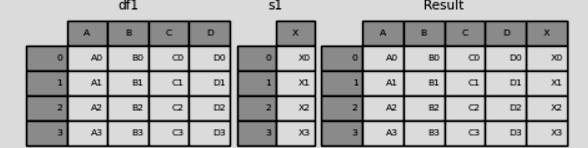

In [106]:
df1

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


In [108]:
s1 = pd.Series(['Admin','Jefe','Jefe','Comercial','Mesero'],name = 'Puesto')
s1

0        Admin
1         Jefe
2         Jefe
3    Comercial
4       Mesero
Name: Puesto, dtype: object

In [111]:
result = pd.concat([df1,s1],axis = 1)
result

,total_bill,tip,sex,Puesto
0,16.99,1.01,Female,Admin
1,10.34,1.66,Male,Jefe
2,21.01,3.50,Male,Jefe
3,23.68,3.31,Male,Comercial
4,24.59,3.61,Female,Mesero


Las **Series** no nombrados serán numerados consecutivamente.

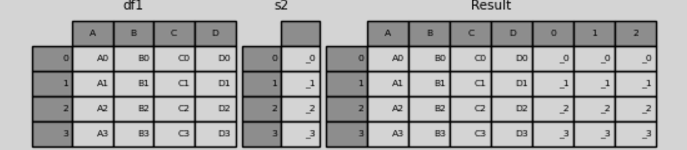

In [112]:
s2 = pd.Series([1.68,1.75,1.92,1.5,1.77])
s2

0    1.68
1    1.75
2    1.92
3    1.50
4    1.77
dtype: float64

In [113]:
result = pd.concat([df1,s2,s2,s2],axis = 1)
result

,total_bill,tip,sex,0,1,2
0,16.99,1.01,Female,1.68,1.68,1.68
1,10.34,1.66,Male,1.75,1.75,1.75
2,21.01,3.50,Male,1.92,1.92,1.92
3,23.68,3.31,Male,1.50,1.50,1.50
4,24.59,3.61,Female,1.77,1.77,1.77


## Resultando `Keys`

El argumento `keys` agrega otro nivel de eje al indice o columna resultante(creando un MultiIndex) y asocia claves específicas con cada original *DataFrame*

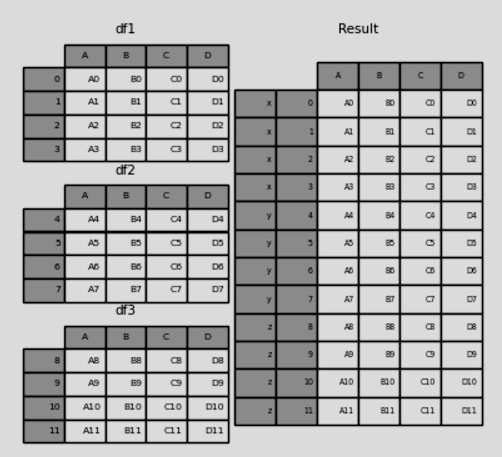

In [114]:
result = pd.concat([df1,df2,df3],keys = ['x','y','z'])
result

total_bill   tip     sex    time  size
x 0       16.99  1.01  Female     NaN   NaN
  1       10.34  1.66    Male     NaN   NaN
  2       21.01  3.50    Male     NaN   NaN
  3       23.68  3.31    Male     NaN   NaN
  4       24.59  3.61  Female     NaN   NaN
y 2       21.01  3.50     NaN  Dinner   3.0
  3       23.68  3.31     NaN  Dinner   2.0
  4       24.59  3.61     NaN  Dinner   4.0
  5       25.29  4.71     NaN  Dinner   4.0
  6        8.77  2.00     NaN  Dinner   2.0
  7       26.88  3.12     NaN  Dinner   4.0
z 0         NaN   NaN     NaN  Dinner   2.0
  1         NaN   NaN     NaN  Dinner   3.0
  2         NaN   NaN     NaN  Dinner   3.0
  3         NaN   NaN     NaN  Dinner   2.0
  4         NaN   NaN     NaN  Dinner   4.0

In [115]:
result.loc['y']

,total_bill,tip,sex,time,size
2,21.01,3.50,NaN,Dinner,3.0
3,23.68,3.31,NaN,Dinner,2.0
4,24.59,3.61,NaN,Dinner,4.0
5,25.29,4.71,NaN,Dinner,4.0
6,8.77,2.00,NaN,Dinner,2.0
7,26.88,3.12,NaN,Dinner,4.0


## Anexar filas a un `DataFrame`

Si tiene una *Series* que desea agregar como una sola fila a un *DataFrame*, puede convertir la fila en un *DataFrame* y usar *concat()*.

In [116]:
df1

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


In [118]:
s2 = pd.Series([22.84,2.74,'Male'],index = df1.columns)
s2

total_bill    22.84
tip            2.74
sex            Male
dtype: object

In [121]:
s2.to_frame()

,0
total_bill,22.84
tip,2.74
sex,Male


In [124]:
result = pd.concat([df1,s2.to_frame().T],axis = 0,ignore_index=True)
result

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.5,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
5,22.84,2.74,Male


# **2.- Merge()**

Realiza operaciones de unión similares a las bases de datos relacionales como SQL. 

In [3]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [4]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [5]:
result = pd.merge(left,right,on = 'key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


EL argumento `how` especifica que claves se incluyen en la tabla resultante. Si una combinación de claves **no aparece** en las tablas izquierda o derecha, los valores de la tabla unida serán `NA`. A continuación, se incluye un resumen de las `how` opciones y sus nombres equivalentes en SQL:

| Método de fusión | Nombre de unión SQL   | Descripción                                                |
|------------------|-----------------------|------------------------------------------------------------|
| left             | LEFT OUTER JOIN       | Utilice únicamente las claves del marco izquierdo          |
| right            | RIGHT OUTER JOIN      | Utilice únicamente las claves del marco derecho            |
| outer            | FULL OUTER JOIN       | Utilice la unión de claves de ambos marcos                  |
| inner            | INNER JOIN            | Utilice la intersección de claves de ambos marcos           |
| cross            | CROSS JOIN            | Crea el producto cartesiano de las filas de ambos marcos.   |


In [6]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)

In [7]:
right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)

In [10]:
result = pd.merge(left,right,how = 'left',on = ['key1','key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [11]:
result = pd.merge(left,right, how = 'right', on = ['key1','key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [14]:
result = pd.merge(left,right, how = 'outer',on = ['key1','key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


In [15]:
result = pd.merge(left,right, how = 'inner',on = ['key1','key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [18]:
rersult = pd.merge(left,right,how = 'cross')
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


## Indicador de resultado de fusión

**Merge** acepta el argumento `indicator`. Si `True`, se agregará una columna de tipo categórico llamada `_merge`al objeto de salida que toma valores:

| Origen de la observación             | `_merge`               |
|--------------------------------------|------------------------|
|Fusionar clave solo en el marco `left`| `left_only`            |
|Fusonar clave solo en el marco `right`| `right_only`           |
|Fusionar clave en ambos cuadros       |  `both`                |

In [20]:
df1 = pd.DataFrame({'col1':[0,1],
                    'col_left':['a','b']})
df1

,col1,col_left
0,0,a
1,1,b


In [21]:
df2 = pd.DataFrame({'col1':[1,2,2],
                    'col_right':[2,2,2]})
df2

,col1,col_right
0,1,2
1,2,2
2,2,2


In [25]:
result = pd.merge(df1,df2,on = 'col1',how = 'outer',indicator=True)
result

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


# **3.- Join()**

**DataFrame.join()** combina las columnas de múltiples índices potencialmente diferentes **DataFrame** en un uncio resultado.

In [26]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

In [27]:
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

In [29]:
result = left.join(right)
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [30]:
result = left.join(right, how = 'outer')
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [31]:
result = left.join(right, how = 'inner')
result

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
